
# Human Trafficking Exploratory Data Analysis (EDA)

This notebook provides an exploratory data analysis (EDA) of a dataset related to human trafficking. It covers various aspects of data preprocessing, visualization, and analysis to gain insights into the dataset.

## Overview

Human trafficking is a complex issue that affects people worldwide. This EDA aims to better understand and visualize the data related to human trafficking victims.

## Data Sources

- The main dataset is loaded from the file `CTDCK_data.csv`. It contains information about human trafficking cases, including various attributes such as citizenship, means of control, and more. The dataset used 
https://www.kaggle.com/datasets/mexwell/human-trafficking-victims-dataset-ctdc

- Additionally, data related to ISO-3 country codes is used for geographical mapping. This information is sourced from the file `continents2.csv`. The datasets used                                                          https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region

## Data Preprocessing

The following steps are taken to prepare the data for analysis:

1. **Data Loading**: The main dataset and ISO-3 country code dataset are loaded using the Pandas library.

2. **Column Removal**: The first column, which contains all null values, is removed from the main dataset.

3. **Merging ISO-3 Codes**: ISO-3 country codes are merged with the main dataset to facilitate geographical analysis.

4. **Duplicate Removal**: Duplicate rows in the dataset are removed to ensure data integrity.

## Data Exploration

The EDA includes the following data exploration and visualization steps:

1. **Data Summary**: Basic information about the dataset, including data types and missing values, is displayed.

2. **Unique Value Counts**: The number of unique values in each categorical column (excluding specific columns) is visualized using a bar chart.

3. **Year of Registration**: A bar chart shows the distribution of human trafficking cases over the years.

4. **Age Distribution**: Another bar chart illustrates the age distribution of victims.

5. **Majority-Related Columns**: Bar charts are used to visualize data from columns starting with 'majority'.

6. **Geographical Analysis**: Choropleth maps are created to show the origin (citizenship) and exploitation locations of human trafficking victims.

7. **Binary Variable Correlation**: A heatmap is generated to visualize the correlation between binary variables in the dataset.

## Conclusion

This EDA provides a comprehensive overview of the human trafficking dataset, enabling insights into various aspects of this critical issue. Further analysis and modeling can be built upon this foundation to address human trafficking more effectively.


# Importing Dependencies

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from plotly.express import choropleth
import seaborn as sns

# Data Loading

In [2]:
# Read the main dataset
df = pd.read_csv('CTDCK_data.csv',
                 low_memory=False, sep=';')

# Read the continents dataset for ISO-3 country codes
continents_df = pd.read_csv('continents2.csv')

# Initial Exploration

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97750 entries, 0 to 97749
Data columns (total 64 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use  0 non-null      float64
 1   yearOfRegistration                                                                               95739 non-null  float64
 2   Datasource                                                                                       97750 non-null  object 
 3   gender                                                                                           89612 non-null  object 
 4   ageBroad                                                                                         50967 non-null  object 
 5   majo

In [4]:
# Display the first few rows of the dataset
df.head()

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0


# Data Cleaning and Manupulation

In [5]:
# Remove the first column as it contains all null values
df = df.iloc[:, 1:]

In [6]:
# Display the first few rows of the dataset
df.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0


### Merging with ISO-3 Country Code

In [7]:
# Merge ISO-3 country codes with the main dataset for citizenship and exploitation countries
df = df.merge(right=continents_df[['alpha-2', 'alpha-3']].rename(columns={'alpha-2': 'citizenship', 'alpha-3': 'citizenship-alpha-3'}), on='citizenship',)
df = df.merge(right=continents_df[['alpha-2', 'alpha-3']].rename(columns={'alpha-2': 'CountryOfExploitation', 'alpha-3': 'CountryOfExploitation-alpha-3'}), on='CountryOfExploitation',)

In [8]:
# Remove duplicate rows
print('We have {} duplicate rows out of {} total.'.format(len(df) - len(df.drop_duplicates(ignore_index=True)), len(df)))
df = df.drop_duplicates(ignore_index=True)

We have 77084 duplicate rows out of 97750 total.


In [9]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20666 entries, 0 to 20665
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   yearOfRegistration                      20640 non-null  float64
 1   Datasource                              20666 non-null  object 
 2   gender                                  19797 non-null  object 
 3   ageBroad                                12358 non-null  object 
 4   majorityStatus                          17813 non-null  object 
 5   majorityStatusAtExploit                 8918 non-null   object 
 6   majorityEntry                           2734 non-null   object 
 7   citizenship                             8589 non-null   object 
 8   meansOfControlDebtBondage               3765 non-null   float64
 9   meansOfControlTakesEarnings             5104 non-null   float64
 10  meansOfControlRestrictsFinancialAccess  2564 non-null   fl

In [10]:
# Display the first few rows of the dataset
df.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,citizenship-alpha-3,CountryOfExploitation-alpha-3
0,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,COL,NAM
1,2002.0,Case Management,Female,24--26,Adult,NaN,NaN,CO,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,COL,NAM
2,2002.0,Case Management,Female,30--38,Adult,NaN,NaN,CO,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,COL,NAM
3,2002.0,Case Management,Female,NaN,NaN,NaN,NaN,CO,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,COL,NAM
4,2003.0,Case Management,Female,NaN,NaN,NaN,NaN,CO,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,COL,NAM


# Exploratory Data Analysis

<Axes: >

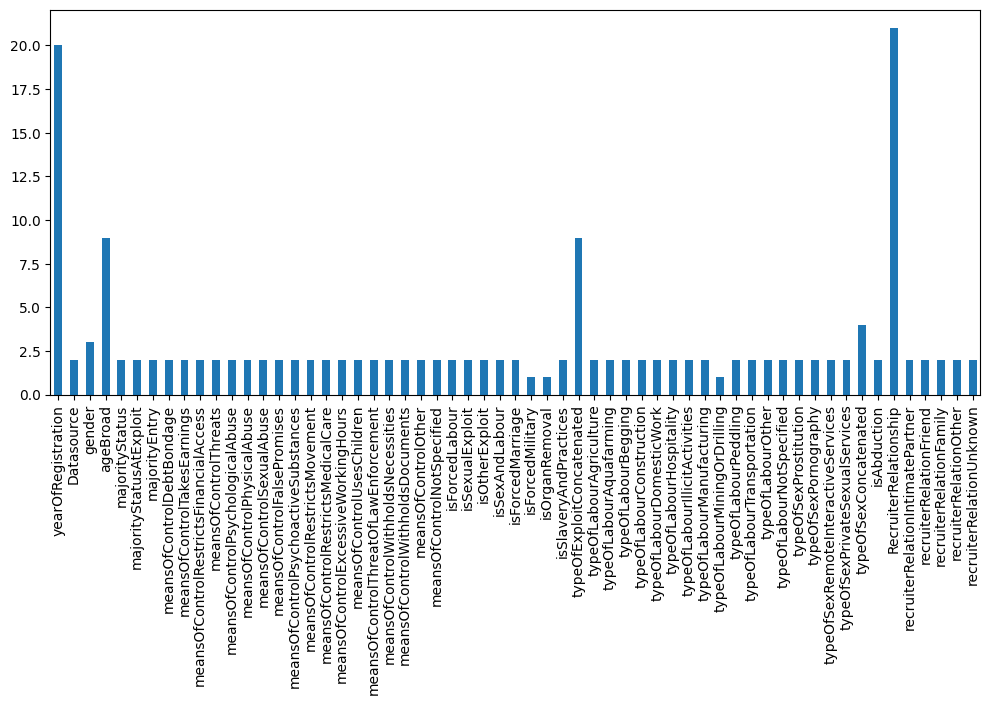

In [11]:
# Plot the number of unique values in each categorical column (excluding specific columns)
plt.figure(figsize=(12, 5))
ignore_columns = ['meansOfControlConcatenated', 'typeOfLabourConcatenated',
                  'citizenship', 'citizenship-alpha-3',
                  'CountryOfExploitation', 'CountryOfExploitation-alpha-3',
                 ]
df.drop(columns=ignore_columns).nunique().plot(kind='bar')

<Axes: >

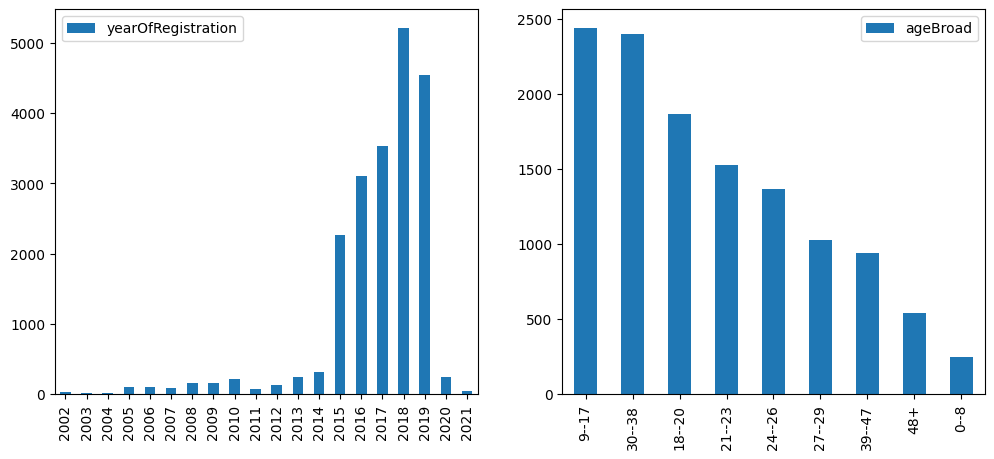

In [12]:
# Create subplots for yearOfRegistration and ageBroad
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
df['yearOfRegistration'].dropna().astype(int).value_counts(sort=False).plot(ax=ax[0], kind='bar', legend=True)
df['ageBroad'].dropna().value_counts(sort=True).plot(ax=ax[1], kind='bar', legend=True)

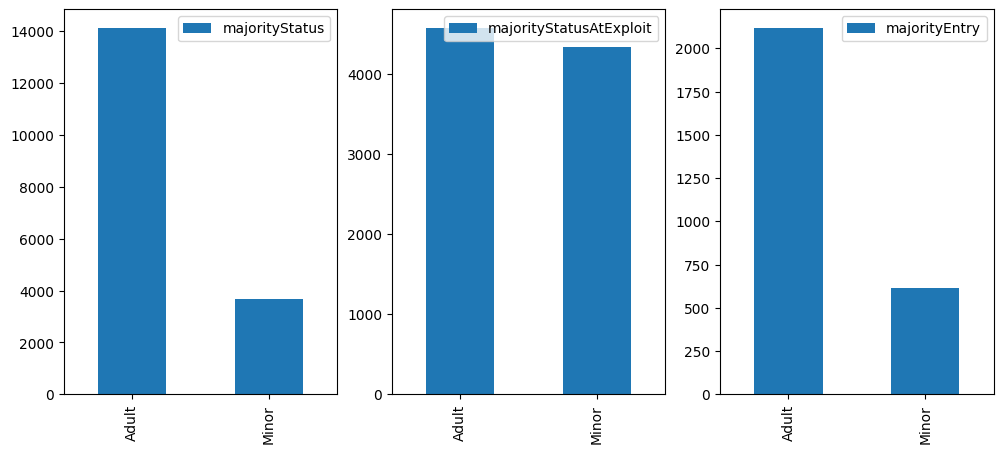

In [13]:
# Plot the majority-related columns
fig, ax = plt.subplots(figsize=(12, 5), ncols=3)
for index, column in enumerate([item for item in df.columns if item.startswith('majority')]):
    df[column].dropna().value_counts(sort=True).plot(ax=ax[index], kind='bar', legend=True)

In [14]:
# Plot where the victims come from (citizenship)
choropleth(data_frame=df['citizenship-alpha-3'].value_counts().to_frame().reset_index().rename(columns={'index': 'country', 'citizenship-alpha-3': 'count'}), color='count', locations='country').show()

In [15]:
# Plot where the victims are exploited
choropleth(data_frame=df['CountryOfExploitation-alpha-3'].value_counts().to_frame().reset_index().rename(columns={'index': 'country', 'CountryOfExploitation-alpha-3': 'count'}), color='count', locations='country').show()

# Corelation

<Axes: >

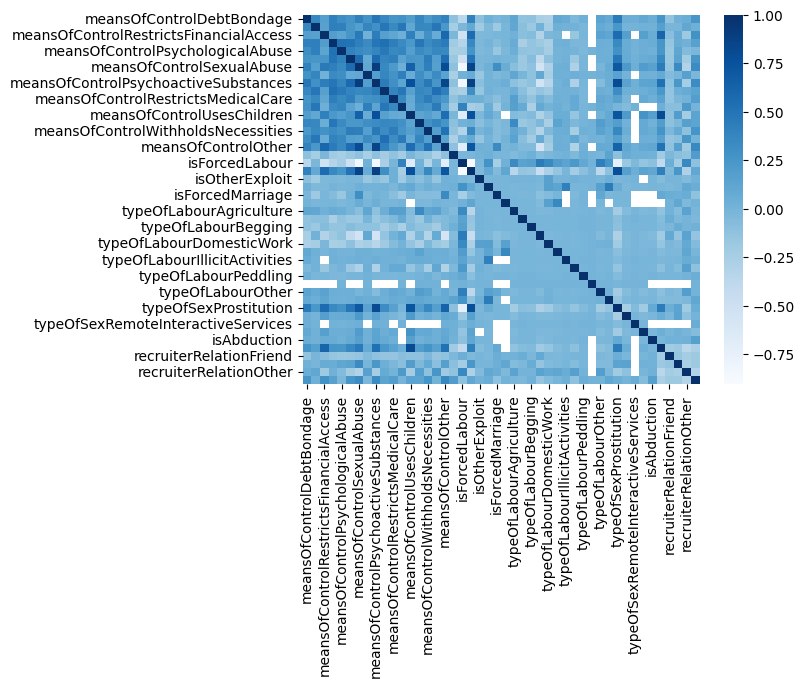

In [16]:
# Create a heatmap to visualize the correlation between binary variables
sns.heatmap(cmap='Blues', data=df[[key for key, value in df.nunique().to_dict().items() if value == 2]].corr(numeric_only=True))
